In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [126]:
@np.vectorize
def gaussian(x, h, order):
    
    RPI = np.pi**0.5
    q = x/float(h)
    sigma = 1.0/(RPI*h)
    
    if order == 0:
        
        q = abs(q)
        
        if q <= 3.0:
            
            return sigma*np.exp(-q*q)
        
        else:
            
            return 0.0
        
    elif order == 1:
        
        if abs(q) <= 3:
            
            return sigma*(-2*q)*np.exp(-q*q)/h
        
        else:
            
            return 0.0
        
    else:
            pass
        

In [127]:
def approx(f, train_set, x, h, kernel, order):
    
    rho = np.sum(kernel(train_set, h, 0))
    return (1.0/rho) * np.sum( kernel( x - train_set, h, order) * f( train_set))
    

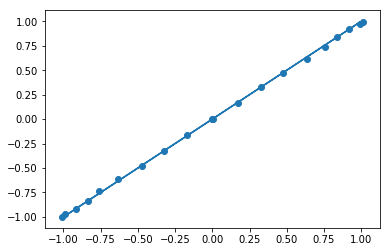

In [128]:
train_set = np.pi*np.linspace(-2,2,100)
dx = train_set[1] - train_set[0]
hdx = 0.7
h = dx * hdx
f = np.sin
kernel = gaussian
order = 0
test_set = np.pi*np.linspace(-1,1,20)
res = []
for x in test_set:
    res.append(approx(f = f, train_set = train_set, x = x, h = h, kernel = kernel, order = order))
plt.scatter(res, f(test_set))
plt.plot(f(test_set), f(test_set))

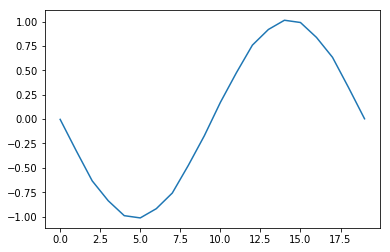

In [129]:
plt.plot(res)

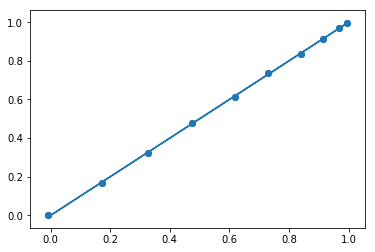

In [130]:
train_set = np.pi*np.linspace(-1,1,100)
dx = train_set[1] - train_set[0]
hdx = 1
h = dx * hdx
f = np.sin
kernel = gaussian
order = 1
test_set = np.pi*np.linspace(-0.5,0.5,20)
res = []
for x in test_set:
    res.append(approx(f = f, train_set = train_set, x = x, h = h, kernel = kernel, order = order))
plt.scatter(np.array(res), np.cos(test_set))
plt.plot(np.cos(test_set), np.cos(test_set))